In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
!pip install pandas numpy matplotlib seaborn

In [ ]:
python.exe -m pip install

In [ ]:
 import numpy as np

In [1]:
!pip show pandas

Name: pandas
Version: 2.2.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [3]:
customers = pd.read_csv("../datasets/Customers.csv")
products = pd.read_csv("../datasets/Products.csv")
transactions = pd.read_csv("../datasets/Transactions.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/Customers.csv'

In [8]:
import os
import pandas as pd

customers = pd.read_csv("D:\Data_Science_Assignment\datasets\Customers.csv")
products = pd.read_csv("D:\Data_Science_Assignment\datasets\Products.csv")
transactions = pd.read_csv("D:\Data_Science_Assignment\datasets\Transactions.csv")

In [9]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3       

In [10]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


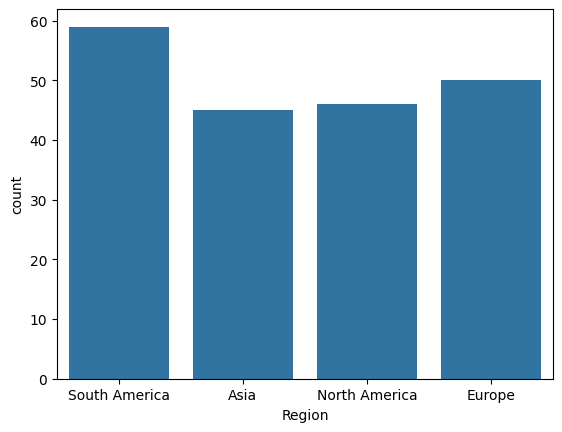

In [11]:
sns.countplot(data=customers, x="Region")
plt.show()

In [12]:
top_products = transactions["ProductID"].value_counts().head(10)
print(top_products)

ProductID
P059    19
P029    17
P054    16
P061    16
P062    16
P079    16
P057    15
P096    15
P022    15
P049    15
Name: count, dtype: int64


In [14]:
revenue_trends = transactions.groupby("YearMonth")["Amount"].sum()
revenue_trends.plot(kind="line", figsize=(10, 5))

KeyError: 'YearMonth'

In [15]:
print(transactions["TransactionDate"].dtype)

object


In [18]:
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"], format="%Y-%m-%d")  # Replace with the actual date format

ValueError: unconverted data remains when parsing with format "%Y-%m-%d": " 12:38:23", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [19]:
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"], format="%Y,%m,%d")

ValueError: time data "2024-08-25 12:38:23" doesn't match format "%Y,%m,%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [20]:
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"], format="%Y-%m-%d", errors="coerce")

In [21]:
print(transactions["TransactionDate"].head())
print(transactions["TransactionDate"].dtype)

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: TransactionDate, dtype: datetime64[ns]
datetime64[ns]


In [22]:
transactions["YearMonth"] = transactions["TransactionDate"].dt.to_period("M")

In [23]:
revenue_trends = transactions.groupby("YearMonth")["Amount"].sum()
revenue_trends.plot(kind="line", figsize=(10, 5))

KeyError: 'Column not found: Amount'

In [24]:
transactions["YearMonth"] = transactions["TransactionDate"].dt.to_period("M")
revenue_trends = transactions.groupby("YearMonth")["Amount"].sum()
revenue_trends.plot(kind="line", figsize=(10,5))
plt.show()

KeyError: 'Column not found: Amount'

In [25]:
print(transactions.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'YearMonth'],
      dtype='object')


ValueError: zero-size array to reduction operation fmin which has no identity

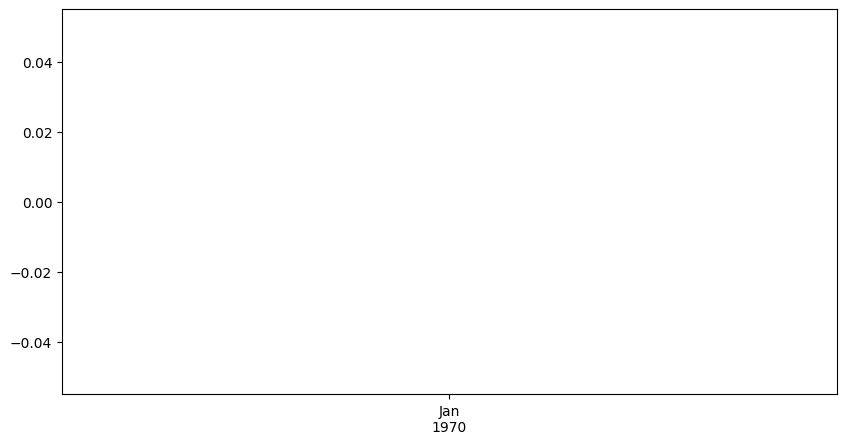

In [27]:
revenue_trends = transactions.groupby("YearMonth")["Price"].sum()
revenue_trends.plot(kind="line", figsize=(10, 5))